In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Ucitavanje i analiza podataka

        Date    Open    High     Low   Close     Volume  Adj Close
0 2023-01-03  14.851  14.996  14.096  14.315  401277000  14.305581
1 2023-01-04  14.567  14.853  14.241  14.749  431324000  14.739295
2 2023-01-05  14.491  14.564  14.148  14.265  389168000  14.255614
3 2023-01-06  14.474  15.010  14.034  14.859  405044000  14.849225
4 2023-01-09  15.284  16.056  15.141  15.628  504231000  15.617719
                                Date        Open        High         Low  \
count                            448  448.000000  448.000000  448.000000   
mean   2023-11-23 17:02:08.571428608   64.193085   65.402489   62.910025   
min              2023-01-03 00:00:00   14.474000   14.564000   14.034000   
25%              2023-06-13 18:00:00   40.477000   41.179751   39.845001   
50%              2023-11-21 12:00:00   48.164499   48.571501   47.447500   
75%              2024-05-03 18:00:00   91.065750   92.465750   89.209751   
max              2024-10-14 00:00:00  139.800003  140.759995  136.

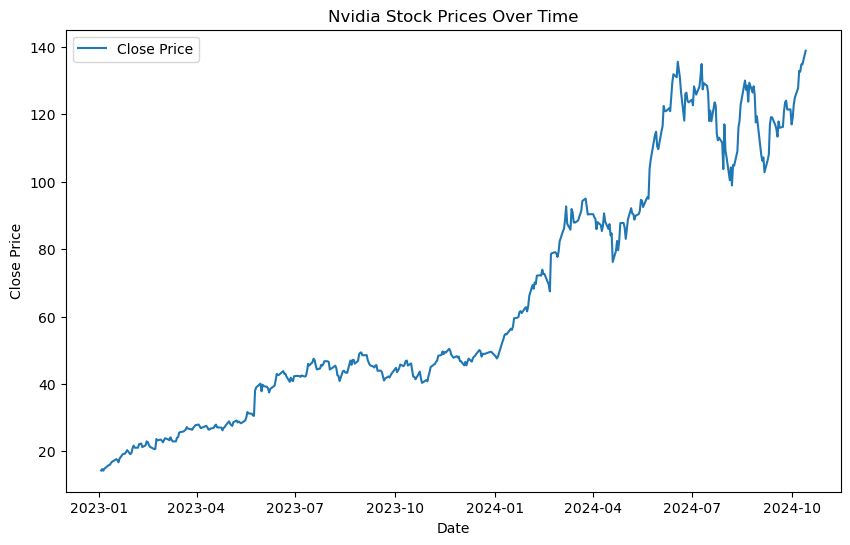

In [32]:
# Učitavanje podataka
data = pd.read_csv("dataset/nvidia.csv")

# Pretvaranje kolone 'Date' u datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sortiranje po datumu
data = data.sort_values(by="Date")

# Prikaz osnovnih informacija
print(data.head())
print(data.describe())

# Vizualizacija cene kroz vreme
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title("Nvidia Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# 2. Inzenjering karakteristika

In [42]:
# Dodavanje novih kolona
data['Daily Range'] = data['High'] - data['Low']
data['Average Price'] = (data['High'] + data['Low']) / 2
data['Volume Change'] = data['Volume'].diff()

# Popunjavanje nedostajućih vrednosti
data.fillna(0, inplace=True)

# 3. Priprema podataka za model
### Podela podataka na ulazne (X) i ciljnu vrednost (y), i dalje na trening i test skupove.


In [34]:
# Ulazne karakteristike i ciljna vrednost
X = data[['Open', 'High', 'Low', 'Volume', 'Daily Range', 'Average Price', 'Volume Change']]
y = data['Close']

# Podela podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Treniranje modela 
### Koristim Random Forest Regressor za predvidjanje

In [40]:
# Treniranje modela
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predikcije na test podacima
y_pred = model.predict(X_test)


# 5. Evaluacija modela
### Izračunavanje metrike za performanse modela.


Mean Squared Error: 2.2690492295041977
Mean Absolute Error: 1.0438669536378637


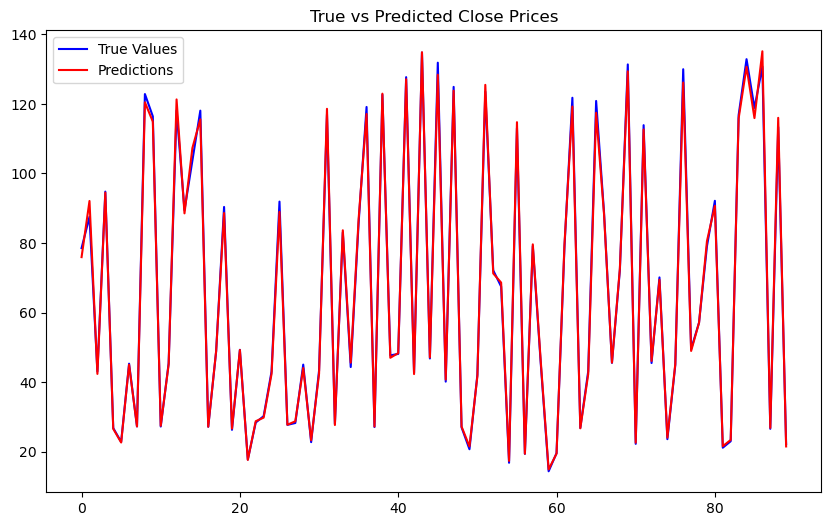

In [36]:
# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Vizualizacija stvarnih i predviđenih vrednosti
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(y_pred, label='Predictions', color='red')
plt.title("True vs Predicted Close Prices")
plt.legend()
plt.show()

# Predikcija buducih cena 
### ako model radi dobro na test podacima, koristim ga za predvidjanje buducih vrednosti

In [47]:
# Podaci koje želiš da predviđaš
future_data = [[14.85, 15.00, 14.09, 401277000, 0.91, 14.54]]
# Dodavanje novih karakteristika za future_data
future_data_df = pd.DataFrame(future_data, columns=['Open', 'High', 'Low', 'Volume', 'Daily Range', 'Average Price'])

# Izračunavanje novih vrednosti
future_data_df['Daily Range'] = future_data_df['High'] - future_data_df['Low']
future_data_df['Average Price'] = (future_data_df['High'] + future_data_df['Low']) / 2

# Računanje razlike u volumenu - preuzimanje prethodnih podataka za izračunavanje
previous_volume = data['Volume'].iloc[-1] if len(data) > 0 else 0  # Poslednji volumen iz trenutnog skupa
future_data_df['Volume Change'] = future_data_df['Volume'] - previous_volume

# Prikazivanje izračunatih vrednosti za buduće podatke
print(future_data_df)

# Predikcija na budućim podacima
future_pred = model.predict(future_data_df[['Open', 'High', 'Low', 'Volume', 'Daily Range', 'Average Price', 'Volume Change']])
print(f"Predicted Close Price: {future_pred[0]}")

    Open  High    Low     Volume  Daily Range  Average Price  Volume Change
0  14.85  15.0  14.09  401277000         0.91         14.545      210835893
Predicted Close Price: 14.859089956283569
